In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import torch.optim as optim

In [51]:
# Helper functions
def predict(X, W):
    YPred = X.dot(W)
    return YPred

In [97]:
num_iterations = 5
N = 10000
D = 10

X = np.random.randn(N, D)
Y = np.random.randn(N, 1)

In [33]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [34]:
#print(diabetes)

In [29]:
diabetes_X_train = X[:-20]
diabetes_X_test = X[-20:]
diabetes_y_train = Y[:-20]
diabetes_y_test = Y[-20:]

('Coefficients: \n', array([938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


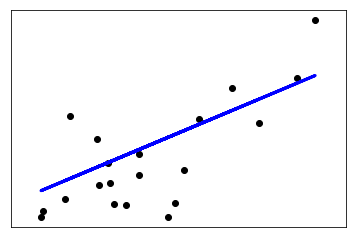

In [40]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [47]:
admm = optim.ADMM([diabetes_X_train, diabetes_y_train, 0.01], "Lasso") #, parallel = True)

print(admm.getLoss())
for i in range(0, 5):
    print('Objective Value:', admm.step())

print('Weights: ',admm.getWeights())
W = admm.getWeights()

2623942383.2329097
('Objective Value:', 2663156030.210076)
('Objective Value:', 2718233711.865551)
('Objective Value:', 2755549908.0834365)
('Objective Value:', 2777025493.9161234)
('Objective Value:', 2788632001.1960063)
('Weights: ', array([[936.25300989]]))


In [52]:
# Comparison with Scikit - LR
admm_predict = predict(diabetes_X_test, W)

In [53]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))


Mean squared error: 20747.88
Variance score: -3.29


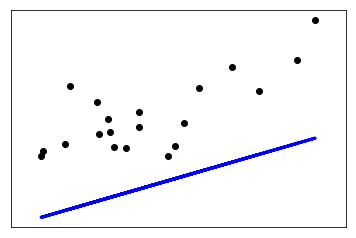

In [54]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, admm_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()